# Data Exploration

Here, I'm going to explore creating heatmaps of where crimes occured. 

To do this, I found this Kaggle script written in R that I pulled inspiration from [this script.](https://www.kaggle.com/ldocao/sf-crime/population-density-heat-map/code). I also found [this](https://www.kaggle.com/ldocao/sf-crime/population-density-heat-map) python scipt that proved helpful. 


First, I got data about the police districts in San Franscisco. 

## Importing Everything

In [1]:
% matplotlib inline
import shapefile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
from datetime import datetime
from ipywidgets import widgets  
from IPython.display import display


## Read in Data
Also, here, I'm converting the timestamp to a timetime object, as well as years, months, days, and hours

In [2]:
crimeData = pd.read_csv('train.csv')

crimeData['DateTime'] = crimeData['Dates'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

crimeData['Year'] = crimeData['DateTime'].apply(lambda x: x.year)
crimeData['Month'] = crimeData['DateTime'].apply(lambda x: x.month)
crimeData['Day'] = crimeData['DateTime'].apply(lambda x: x.day)
crimeData['Hour'] = crimeData['DateTime'].apply(lambda x: x.hour)

crimeData

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DateTime,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00,2015,5,13,23
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015-05-13 23:30:00,2015,5,13,23
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015-05-13 23:30:00,2015,5,13,23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015-05-13 23:30:00,2015,5,13,23
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015-05-13 23:00:00,2015,5,13,23
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015-05-13 23:00:00,2015,5,13,23


## Get Count of Crimes by District 
Here, I want to create an interactive display that allows me to choose different categories and see how the number of crimes for each district (the selected crimes only) changes over time). I want to be able to specify both the types of crimes I want to look at and the year. 

First, I'm going to get the list of all the categories the user wants to include

In [3]:
crimeTypes = crimeData.Category.unique().tolist()
checkboxes = {}
for crime in crimeTypes:
    checkboxes[crime] = widgets.Checkbox(description=crime, value=False)
    display(checkboxes[crime])

Now, we need to get all the checked boxes. 

In [7]:
selectedCategories = []
for crime in checkboxes:
    if (checkboxes[crime].value):
        selectedCategories.append(crime)

In [8]:
crimeCountByDistrict = crimeData[crimeData.Category.isin(selectedCategories)].groupby(['PdDistrict','Year']).count().reset_index()

## Creating Plot of Crimes by Police District
Here, I'm going to plot the number of crimes that occurred in each police district. 

Here, I'm reading in the shapefile and plotting the neighborhoods

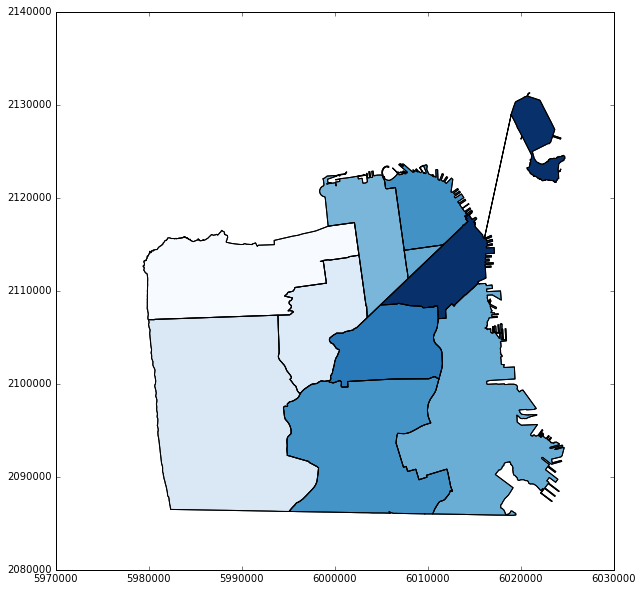

In [9]:
sf = shapefile.Reader("./sfpd_districts/sfpd_districts.shp")

policeDistricts = sf.shapeRecords()
numDistricts = len(policeDistricts)

CrimesYearsDict = {}

districtOrder = []
districtShapes = []
districtOutlines = []

for district in policeDistricts:
    
    xDistrict = [i[0] for i in district.shape.points[:]]
    yDistrict = [i[1] for i in district.shape.points[:]]
    
    districtOrder.append(district.record[1])
#     print(district.record)

    districtPolygon = Polygon(np.array([xDistrict,yDistrict]).T, closed=True) #get one single polygon
    districtShapes.append(districtPolygon)
    districtOutlines.append((xDistrict,yDistrict))



for year in crimeCountByDistrict.Year.unique().tolist():
    districtColors = []
    for district in districtOrder:
        numCrimes = crimeCountByDistrict[
            (crimeCountByDistrict.Year == year) 
            & (crimeCountByDistrict.PdDistrict == district)]['Dates'].tolist()
        
        if (len(numCrimes) <1):
            numCrimes = [0]

        maxCrimeCount = crimeCountByDistrict[crimeCountByDistrict.Year == year]['Dates'].max()
        districtColors.append(1.0*numCrimes[0]/maxCrimeCount)
    


        colors = np.array(map(float,districtColors)) #convert to float

        CrimesYearsDict[year] = colors


def image_display(i):
    fig, ax = plt.subplots(figsize=(10,10))
    for xDistrict, yDistrict in districtOutlines:
        plt.plot(xDistrict, yDistrict, 'k')
    p = PatchCollection(districtShapes, cmap="Blues")
    p.set_array(CrimesYearsDict[i])
    ax.add_collection(p)
    plt.axis('scaled')
    plt.show()


step_slider = widgets.IntSlider(min=2003, max=2015, value=2003)
widgets.interact(image_display, i=step_slider)